In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#https://www.kaggle.com/elenapetrova/time-series-analysis-and-forecasts-with-prophet

In [32]:
#os.chdir(r"C:\python\ML_case_study_ey")

In [47]:
sales_data = pd.read_excel("case_study_ML.xlsx")

In [48]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SKU         150 non-null object
ISO_Week    150 non-null object
Sales       143 non-null float64
Season      150 non-null object
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [49]:
sales_data.describe()

,Sales
count,143.000000
mean,5279.776224
std,6184.437917
min,-163.000000
25%,290.500000
50%,4341.000000
75%,10191.500000
max,52524.000000


In [50]:
sales_data.describe(include=['O'])

,SKU,ISO_Week,Season
count,150,150,150
unique,3,52,4
top,colgate,2018-15,SPRING
freq,54,5,42


In [60]:
#duplicates
sales_data[sales_data.duplicated(subset={'SKU','ISO_Week','Sales','Season'})]


,SKU,ISO_Week,Sales,Season
4,colgate,2018-04,6988.0,WINTER
16,colgate,2018-15,10012.0,SPRING
62,pepsodent,2018-08,219.0,WINTER
112,closeup,2018-15,5533.0,SPRING


In [61]:
sales_data_nodup = sales_data.drop_duplicates(subset={'SKU','ISO_Week','Sales','Season'})

In [97]:
sales_data_nodup['ISO_Week'].dtype

dtype('O')

In [110]:
#sales_data_nodup['ISO_Week1'] = pd.to_datetime(sales_data_nodup['ISO_Week'])



2018-03
2018-01-15 00:00:00


In [114]:
sales_data_nodup['ISO_Week1'] = sales_data_nodup['ISO_Week'].apply(lambda row: datetime.datetime.strptime(row + '-1', "%Y-%W-%w"))

C:\Users\ramecher\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
sales_data_nodup

,SKU,ISO_Week,Sales,Season,ISO_Week1
0,colgate,2018-01,0.0,WINTER,2018-01-01
1,colgate,2018-02,0.0,WINTER,2018-01-08
2,colgate,2018-03,0.0,WINTER,2018-01-15
3,colgate,2018-04,6988.0,WINTER,2018-01-22
5,colgate,2018-05,6743.0,WINTER,2018-01-29
6,colgate,2018-06,4112.0,WINTER,2018-02-05
7,colgate,2018-07,5732.0,WINTER,2018-02-12
8,colgate,2018-08,NaN,WINTER,2018-02-19
9,colgate,2018-09,5559.0,SPRING,2018-02-26
10,colgate,2018-10,5381.0,SPRING,2018-03-05


In [92]:
#pd.to_datetime(sales_data_nodup.ISO_Week, format = '%Y-%W').dt.strftime('%Y-%M-%d')
pd.to_datetime(sales_data_nodup.ISO_Week.str.map(lambda x: str(x)+'-0'), format="%Y%W-%w")

AttributeError: 'StringMethods' object has no attribute 'map'

In [76]:
from datetime import datetime

In [62]:
sales_data_nodup['SKU'].unique()

array([u'colgate', u'pepsodent', u'closeup'], dtype=object)

In [63]:
sales_data_nodup['Season'].unique()

array([u'WINTER', u'SPRING', u'SUMMER', u'AUTUMN'], dtype=object)

In [64]:
sales_data_nodup['SKU'].value_counts()

pepsodent    52
colgate      52
closeup      42
Name: SKU, dtype: int64

In [65]:
sales_data_nodup.groupby('SKU').Sales.count()

SKU
closeup      42
colgate      48
pepsodent    49
Name: Sales, dtype: int64

In [66]:
sales_data_nodup[sales_data_nodup.isnull().any(axis=1)]

,SKU,ISO_Week,Sales,Season
8,colgate,2018-08,NaN,WINTER
19,colgate,2018-18,NaN,SPRING
30,colgate,2018-29,NaN,SUMMER
31,colgate,2018-30,NaN,SUMMER
54,pepsodent,2018-01,NaN,WINTER
55,pepsodent,2018-02,NaN,WINTER
56,pepsodent,2018-03,NaN,WINTER


In [67]:
sales_data_nodup[sales_data_nodup['Sales']<=0]

,SKU,ISO_Week,Sales,Season
0,colgate,2018-01,0.0,WINTER
1,colgate,2018-02,0.0,WINTER
2,colgate,2018-03,0.0,WINTER
57,pepsodent,2018-04,-23.0,WINTER
66,pepsodent,2018-12,-50.0,SPRING
67,pepsodent,2018-13,0.0,SPRING
68,pepsodent,2018-14,0.0,SPRING
69,pepsodent,2018-15,0.0,SPRING
70,pepsodent,2018-16,0.0,SPRING
71,pepsodent,2018-17,0.0,SPRING


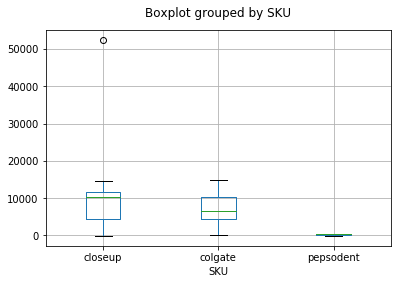

In [68]:
sales_data_nodup.boxplot(column = 'Sales', by = 'SKU');
plt.title('')

In [52]:
sales_data

,SKU,ISO_Week,Sales,Season
0,colgate,2018-01,0.0,WINTER
1,colgate,2018-02,0.0,WINTER
2,colgate,2018-03,0.0,WINTER
3,colgate,2018-04,6988.0,WINTER
4,colgate,2018-04,6988.0,WINTER
5,colgate,2018-05,6743.0,WINTER
6,colgate,2018-06,4112.0,WINTER
7,colgate,2018-07,5732.0,WINTER
8,colgate,2018-08,NaN,WINTER
9,colgate,2018-09,5559.0,SPRING


In [30]:
#sales_data[sales_data.isnull()]
#print (sales_data.isnull())

In [92]:
pd.crosstab(sales_data.ISO_Week, sales_data.SKU,  margins=True)

SKU,closeup,colgate,pepsodent,All
ISO_Week,,,,
2018-01,0,1,1,2
2018-02,0,1,1,2
2018-03,0,1,1,2
2018-04,0,2,1,3
2018-05,0,1,1,2
2018-06,0,1,1,2
2018-07,0,1,1,2
2018-08,0,1,2,3
2018-09,0,1,1,2


In [100]:
data =sales_data.groupby([
    'ISO_Week',
    'SKU',
]).Sales.max().unstack()

In [101]:
data = data.reset_index()

In [47]:
data = data.rename(columns={'SKU':'Week'})
#data.index(columns={'ISO_Week'})

In [102]:
data.set_index(['ISO_Week'], inplace = True, 
                    append = True, drop = True) 

In [108]:
data = data.fillna(0)

In [104]:
data[data < 0] = 0

In [114]:
data.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], [u'2018-01', u'2018-02', u'2018-03', u'2018-04', u'2018-05', u'2018-06', u'2018-07', u'2018-08', u'2018-09', u'2018-10', u'2018-11', u'2018-12', u'2018-13', u'2018-14', u'2018-15', u'2018-16', u'2018-17', u'2018-18', u'2018-19', u'2018-20', u'2018-21', u'2018-22', u'2018-23', u'2018-24', u'2018-25', u'2018-26', u'2018-27', u'2018-28', u'2018-29', u'2018-30', u'2018-31', u'2018-32', u'2018-33', u'2018-34', u'2018-35', u'2018-36', u'2018-37', u'2018-38', u'2018-39', u'2018-40', u'2018-41', u'2018-42', u'2018-43', u'2018-44', u'2018-45', u'2018-46', u'2018-47', u'2018-48', u'2018-49', u'2018-50', u'2018-51', u'2018-52']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

In [118]:
data.reset_index()

SKU,level_0,ISO_Week,closeup,colgate,pepsodent
0,0,2018-01,0.0,0.0,0.0
1,1,2018-02,0.0,0.0,0.0
2,2,2018-03,0.0,0.0,0.0
3,3,2018-04,0.0,6988.0,0.0
4,4,2018-05,0.0,6743.0,446.0
5,5,2018-06,0.0,4112.0,361.0
6,6,2018-07,0.0,5732.0,229.0
7,7,2018-08,0.0,0.0,219.0
8,8,2018-09,0.0,5559.0,495.0
9,9,2018-10,0.0,5381.0,278.0


In [119]:
data = data.reset_index().drop('level_0', axis=1)

In [128]:
closeup_data = data[['ISO_Week','closeup']]
colgate_data = data[['ISO_Week','colgate']]
pepsodent_data = data[['ISO_Week','pepsodent']]


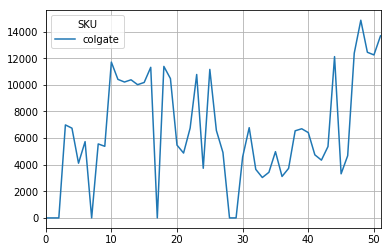

In [131]:
colgate_data.plot(grid=True)

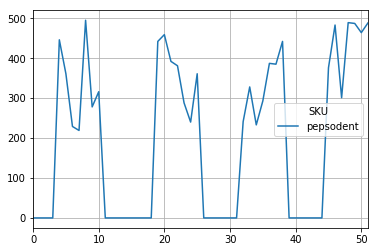

In [132]:
pepsodent_data.plot(grid=True)

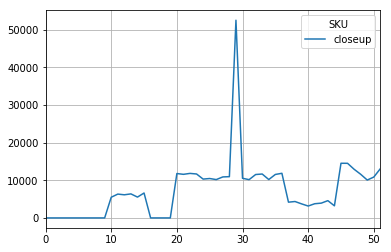

In [133]:
closeup_data.plot(grid=True)

In [ ]:
from sklearn.preprocessing import Imputer
values = mydata.values
imputer = Imputer(missing_values=’NaN’, strategy=’mean’)
transformed_values = imputer.fit_transform(values)

In [37]:
sales_data['SKU'].unique()

array(['colgate', 'pepsodent', 'closeup'], dtype=object)

In [38]:
sales_data['Season'].unique()

array(['WINTER', 'SPRING', 'SUMMER', 'AUTUMN'], dtype=object)

In [47]:
sales_data['SKU'].unique()
sales_data['Season'].unique()
sales_data.groupby('SKU').Sales.count()
sales_data['SKU'].value_counts()

SKU
closeup      43
colgate      50
pepsodent    50
Name: Sales, dtype: int64

In [51]:
sales_data['SKU'].value_counts()

colgate      54
pepsodent    53
closeup      43
Name: SKU, dtype: int64

In [78]:
#sales_data['ISO_Week'].value_counts()

In [78]:
sales_data_nodup = sales_data.drop_duplicates(subset={'SKU','ISO_Week','Sales','Season'})

In [79]:
sales_data_nodup['SKU'].value_counts()

pepsodent    52
colgate      52
closeup      42
Name: SKU, dtype: int64

In [80]:
#sales_data_nodup.sort_values(by=['SKU','ISO_Week'])[sales_data['SKU']=='closeup']

closeup_data = sales_data[sales_data['SKU']=='closeup'].sort_values(by=['SKU','ISO_Week'])

In [81]:
closeup_data.

AttributeError: 'DataFrame' object has no attribute 'isna'

In [92]:
sales_data_nodup.isnull().any().any()

True

In [80]:
#duplicates in close up
#closeup_data[closeup_data.duplicated(subset={'SKU','ISO_Week','Sales','Season'})]

In [63]:
#closeup_datacolgate_data = sales_data[sales_data['SKU']=='colgate'].sort_values(by=['SKU','ISO_Week'])

In [81]:
##duplicates in colgatecloseup_data
#colgate_data[colgate_data.duplicated(subset={'SKU','ISO_Week','Sales','Season'})]

In [66]:
#pepsodent_data = sales_data[sales_data['SKU']=='pepsodent'].sort_values(by=['SKU','ISO_Week'])

In [82]:
#duplicates in pepsodent
#pepsodent_data[pepsodent_data.duplicated(subset={'SKU','ISO_Week','Sales','Season'})]

In [12]:
nodup_sales_data = sales_data.drop_duplicates(subset={'SKU','ISO_Week','Sales','Season'})

In [13]:
nodup_sales_data.shape

(146, 4)

In [25]:
nodup_sales_data = nodup_sales_data[nodup_ml_data['Sales'] != 0.0]

In [29]:
nodup_sales_data.shape

(126, 4)

In [27]:
final_sales_data = nosales_ml_data.dropna(axis=0,how='any')

In [28]:
final.shape

(119, 4)

In [30]:
final.groupby('SKU').Sales.count()

SKU
closeup      42
colgate      45
pepsodent    32
Name: Sales, dtype: int64